<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/6_20_Challenge_Clustering_Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

## Clustering - Mini Hackathon 
Make a copy of this notebook to edit!

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.searchenginejournal.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fcopy-the-colab-notebook-to-your-google-drive-5f2579179f746.jpg&f=1&nofb=1" alt="Make a copy" class="center" height="200">

</center>


# ⛹ Task : 
Your task is to use the same [dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv) we used in today's sample Clustering hackathon to create clusters using different features than just 'lat' and 'long' that would be useful to either 
> A) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. **(no train test split required)** OR

> B) Improve a supervised learning model to predict the price of a house.  You can use any model you want, but must include cluster labels as a feature.**If you choose this option, you must train test split.**

# This data is clean and all numeric, so you should be able to go straight into tuning your KMeans model.

The data given is adapted from [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv).The data dictionary is given below:
- price: selling price of home
- rooms: number of rooms other than bedrooms and bathrooms  
- bed: number of bedrooms
- bath: number of bathrooms
- car: number of car spots
- land: land size in meters
- lat: Latitude
- long: Longitude

## In 2 minutes report: 
1. Which task did you choose, a or b?
2. Which features did you use?
3. How many clusters did you make?
4. How are the clusters different? 
  **OR**   
Did they improve your supervised learning model vs not using them?

In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [55]:
# Load Data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv')
df.head()

,price,rooms,bed,bath,car,land,lat,long
0,1480000,2,2,1,1,202,-37.7996,144.9984
1,1035000,2,2,1,0,156,-37.8079,144.9934
2,1465000,3,3,2,0,134,-37.8093,144.9944
3,850000,3,3,2,1,94,-37.7969,144.9969
4,1600000,4,3,1,2,120,-37.8072,144.9941


In [56]:
df.duplicated().sum()

22

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17479 entries, 0 to 17500
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17479 non-null  int64  
 1   rooms   17479 non-null  int64  
 2   bed     17479 non-null  int64  
 3   bath    17479 non-null  int64  
 4   car     17479 non-null  int64  
 5   land    17479 non-null  int64  
 6   lat     17479 non-null  float64
 7   long    17479 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [59]:
df.describe()

,price,rooms,bed,bath,car,land,lat,long
count,1.747900e+04,17479.000000,17479.000000,17479.000000,17479.000000,17479.000000,17479.000000,17479.000000
mean,1.061880e+06,3.041593,3.024544,1.571143,1.690028,592.575319,-37.806108,144.996018
std,5.601807e+05,0.936683,0.949957,0.688174,0.991686,3807.574687,0.089590,0.117446
min,8.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790
25%,6.570000e+05,2.000000,2.000000,1.000000,1.000000,220.000000,-37.859200,144.924300
50%,9.100000e+05,3.000000,3.000000,1.000000,2.000000,512.000000,-37.798590,145.002430
75%,1.326000e+06,4.000000,4.000000,2.000000,2.000000,662.000000,-37.749000,145.067600
max,3.450000e+06,12.000000,20.000000,9.000000,18.000000,433014.000000,-37.399460,145.526350


# Task A: Analysis

* Cluster the houses 
* Explain how the clusters are different. (no train test split required)



In [60]:
inertias = []
sils = []
ks = range(2, 11)
for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  inertias.append(kmeans.inertia_)
  sils.append(silhouette_score(df, kmeans.labels_))

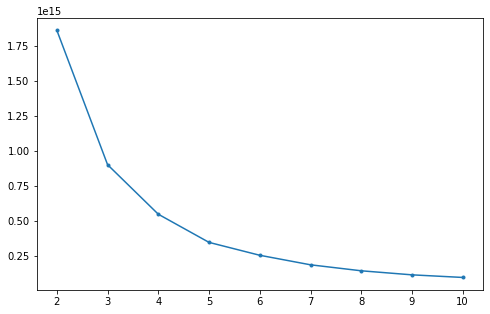

In [62]:
plt.figure(figsize = (8, 5))
plt.plot(ks, inertias, marker = '.')

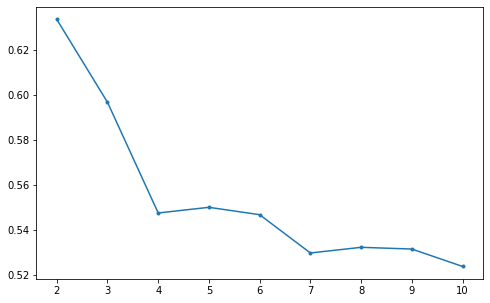

In [63]:
plt.figure(figsize = (8, 5))
plt.plot(ks, sils, marker = '.')

In [71]:
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans4 = KMeans(n_clusters = 4)
kmeans2.fit(df)
kmeans3.fit(df)
kmeans4.fit(df)
df2 = df.copy()
df2['clusters'] = kmeans2.labels_
df3 = df.copy()
df3['clusters'] = kmeans3.labels_
df4 = df.copy()
df4['clusters'] = kmeans4.labels_
df2['clusters']

0        1
1        0
2        1
3        0
4        1
        ..
17496    0
17497    1
17498    0
17499    0
17500    0
Name: clusters, Length: 17479, dtype: int32

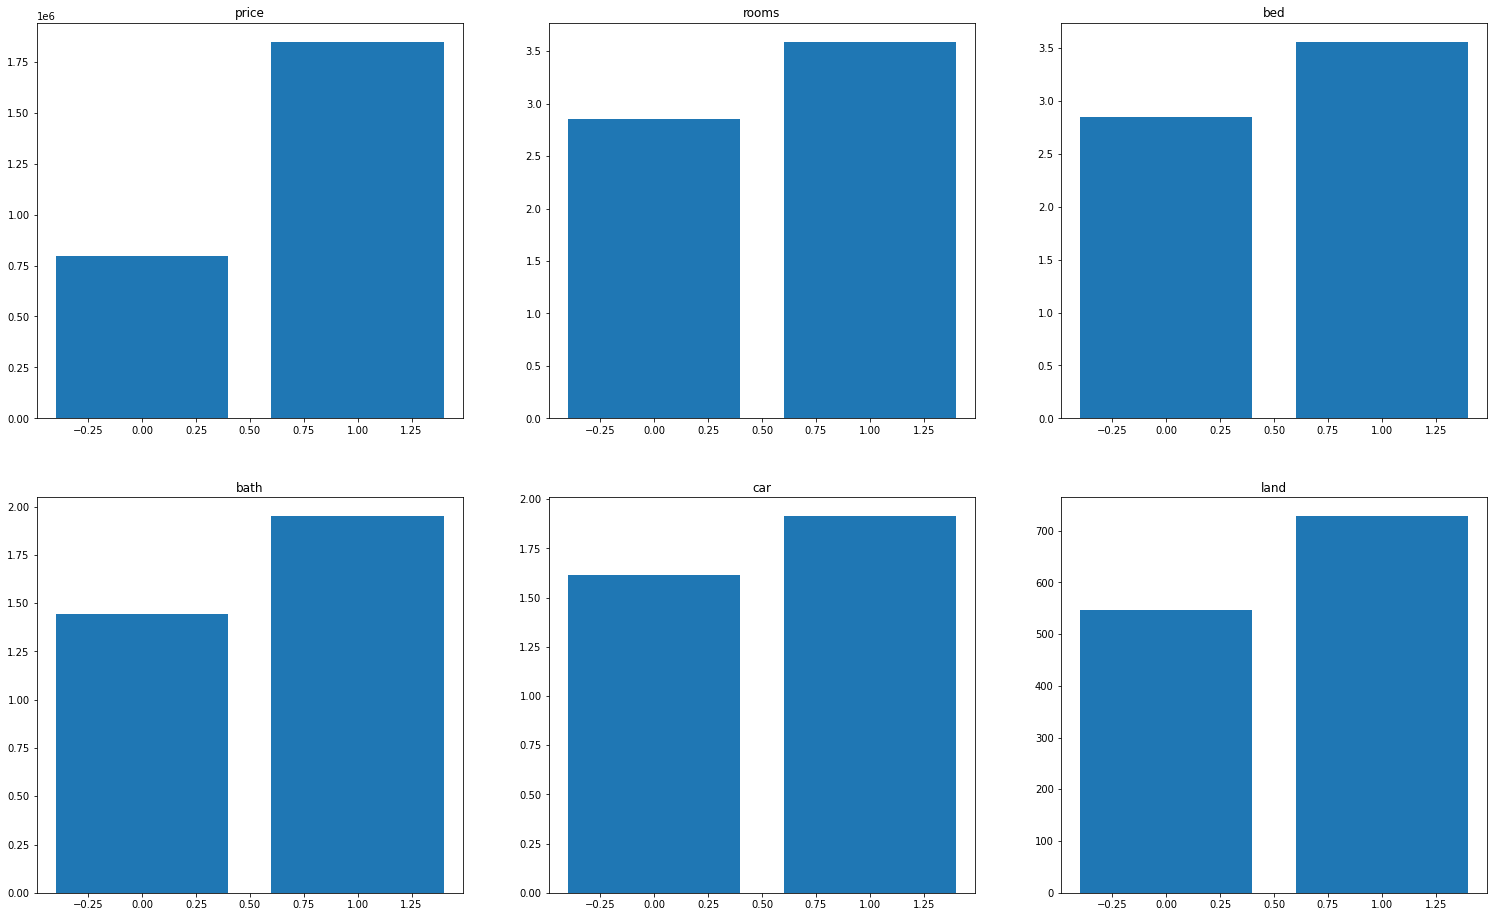

In [77]:
cols = df2.columns.drop(['clusters', 'lat', 'long'])

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (26, 16));
axes = axes.ravel()
for i, col in enumerate(cols):
  axes[i].bar(x = df2['clusters'].value_counts().index,
              height = df2.groupby('clusters')[col].mean())
  axes[i].set_title(col)

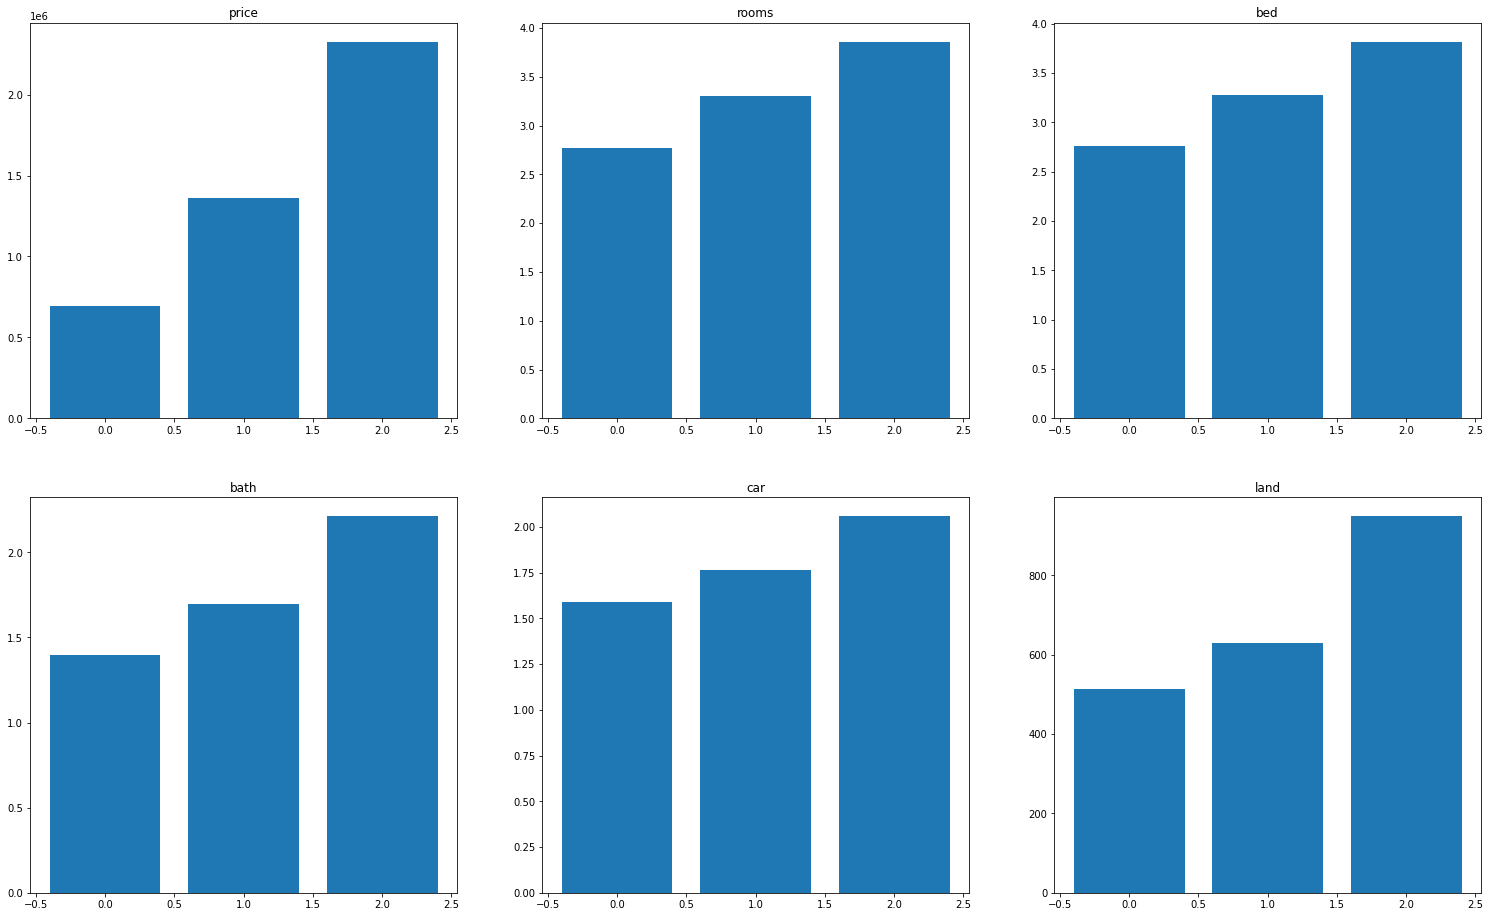

In [78]:
cols = df3.columns.drop(['clusters', 'lat', 'long'])

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (26, 16));
axes = axes.ravel()
for i, col in enumerate(cols):
  axes[i].bar(x = df3['clusters'].value_counts().index,
              height = df3.groupby('clusters')[col].mean())
  axes[i].set_title(col)

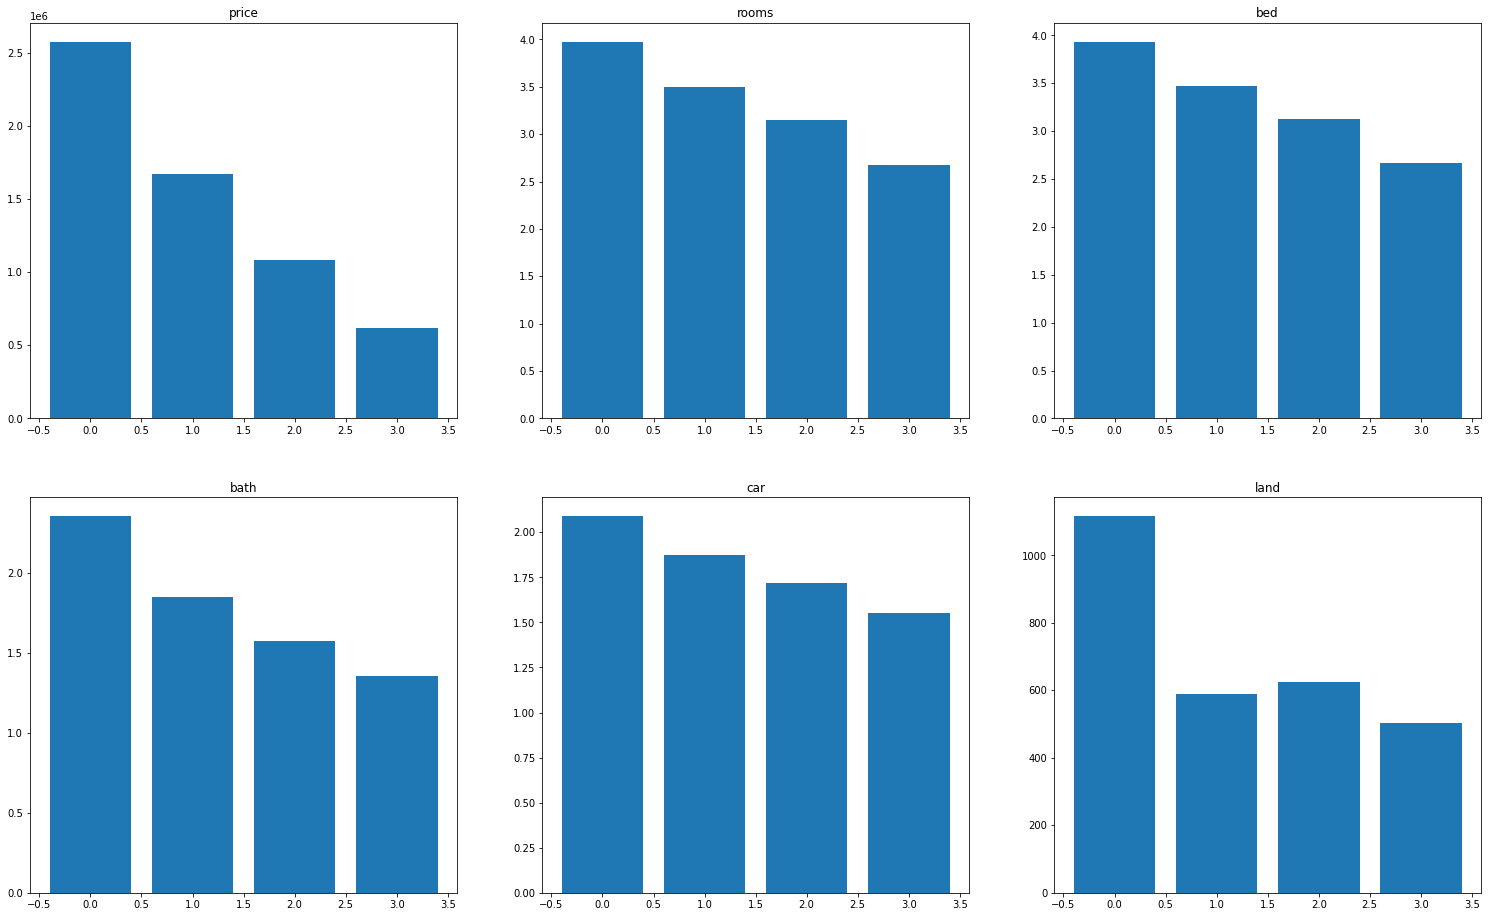

In [79]:
cols = df4.columns.drop(['clusters', 'lat', 'long'])

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (26, 16));
axes = axes.ravel()
for i, col in enumerate(cols):
  axes[i].bar(x = df4['clusters'].value_counts().index,
              height = df4.groupby('clusters')[col].mean())
  axes[i].set_title(col)

# Task B: Prediction

## **If you choose this option, you must train test split before clustering.**


* Use KMeans clustering to create a new feature for supervised learning
* Improve a supervised learning model to predict the price of a house. 
* You can use any model you want, but must include cluster labels as a feature. 


